# Education

In this assessment, you'll apply `pandas` and `seaborn` to process and visualize education statistics.

The [National Center for Education Statistics](https://nces.ed.gov/) is a U.S. federal government agency for collecting and analyzing data related to education. We have downloaded and cleaned one of their datasets: *[Percentage of persons 25 to 29 years old with selected levels of educational attainment, by race/ethnicity and sex: Selected years, 1920 through 2018](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp)*.

In [ ]:
# For testing purposes
from matplotlib.patches import Rectangle
from pandas.testing import assert_series_equal

import pandas as pd
import seaborn as sns

sns.set_theme()

The `nces-ed-attainment.csv` file has the columns `Year`, `Sex`, `Min degree`, and percentages for each subdivision of 25 to 29 year-olds in the specified year, sex, and min degree. The data is represented as a `pandas` `DataFrame` with the following `MultiIndex` and columns.

- `Year` is the first level of the `MultiIndex` with values ranging from 1920 to 2018.
- `Sex` is the second level of the `MultiIndex` with values `F` for female, `M` for male, or `A` for all students.
- `Min degree` is the third level of the `MultiIndex` with values referring to the minimum degree of educational attainment: `high school`, `associate's`, `bachelor's`, or `master's`.
- `Total` is the overall percentage of the given `Sex` population in the `Year` with at least the `Min degree` of educational attainment.
- `White`, `Black`, `Hispanic`, `Asian`, `Pacific Islander`, `American Indian/Alaska Native`, and `Two or more races` is the percentage of students of the specified racial category (and of the `Sex` in the `Year`) with at least the `Min degree` of educational attainment.

Missing data is denoted `NaN` (not a number).

In [ ]:
data = pd.read_csv(
    "nces-ed-attainment.csv",
    na_values=["---"],
    index_col=["Year", "Sex", "Min degree"]
).sort_index(level="Year", sort_remaining=False)
data

The cell above reads `nces-ed-attainment.csv` and replaces all occurrences of the `str` `---` with `pandas` `NaN` to help with later data processing steps. By defining a `MultiIndex` on the columns `Year`, `Sex`, and `Min degree`, we can answer questions like "What is the overall percentage of all 25 to 29 year-olds in the year 2018 who have at least a high school degree?" with the following `df.loc[index, columns]` expression.

In [ ]:
data.loc[(2018, "A", "high school"), "Total"]

For this assessment, instead of writing test cases, we'll only be working with the educational attainment dataset described above. We've provided one test case for each function that includes the exact expected values for each function. Instead of extending the test cases, you'll be asked to write-up and reason about the quality of work demonstrated in each task.

## Task: Compare bachelor's in a given year

Write a function `compare_bachelors_year` that takes the educational attainment `data` and a year and returns a two-row `Series` that indicates the percentages of M/F 25 to 29 year-olds who achieved at least a bachelor's degree in the given year.

In [ ]:
def compare_bachelors_year(data, year):
    ...


output = compare_bachelors_year(data, 1980)
assert_series_equal(output, pd.Series([24., 21.], name="Total",
    index=pd.MultiIndex.from_product([[1980], ["M", "F"], ["bachelor's"]], names=data.index.names)
))
output

## Task: Mean min degree between given years for a given category

Write a function `mean_min_degrees` that takes the educational attainment `data`, a `start_year` (default `None`), an `end_year` (default `None`), a string `category` (default `"Total"`) and returns a `Series` indicating, for each `Min degree` within the given years, the average percentage of educational attainment for people of the given `category` between the `start_year` and the `end_year` for the sex `A`. When `start_year` or `end_year` is `None`, consider all rows from either the beginning or end of the dataset (respectively).

In [ ]:
def mean_min_degrees(data, start_year=None, end_year=None, category="Total"):
    ...


output = mean_min_degrees(data, start_year=2000, end_year=2009)
assert_series_equal(output, pd.Series([38.366667, 29.55, 87.35, 6.466667], name="Total",
    index=pd.Index(["associate's", "bachelor's", "high school", "master's"], name="Min degree")
))
output

## Writeup: Debugging `NaN` values

While writing test cases, one of your coworkers noticed that some calls to `mean_min_degrees` produce `NaN` values and wanted your opinion on whether or not this is a bug with the function. **[Using the data source](https://nces.ed.gov/programs/digest/d18/tables/dt18_104.20.asp), explain why a `NaN` value appears in the result of the following code cell.**

*Replace this text with your answer.*

In [ ]:
mean_min_degrees(data, category="Pacific Islander")

## Task: Line plot for total percentage for the given min degree

Write a function `line_plot_min_degree` that takes the educational attainment `data` and a min degree and returns the result of calling `sns.relplot` to produce a line plot. The resulting line plot should show only the `Total` percentage for sex `A` with the specified min degree over each year in the dataset. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for all bachelor's" (if using bachelor's as the min degree).

In [ ]:
def line_plot_min_degree(data, min_degree):
    ...


ax = line_plot_min_degree(data, "bachelor's").facet_axis(0, 0)
assert [tuple(xy) for xy in ax.get_lines()[0].get_xydata()] == [
    (1940,  5.9), (1950,  7.7), (1960, 11.0), (1970, 16.4), (1980, 22.5), (1990, 23.2),
    (1995, 24.7), (2000, 29.1), (2005, 28.8), (2006, 28.4), (2007, 29.6), (2008, 30.8),
    (2009, 30.6), (2010, 31.7), (2011, 32.2), (2012, 33.5), (2013, 33.6), (2014, 34.0),
    (2015, 35.6), (2016, 36.1), (2017, 35.7), (2018, 37.0),
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[1:]), "unexpected extra data"
assert ax.get_title() == "Min degree for all bachelor's", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Task: Bar plot for high school min degree percentage by sex in a given year

Write a function `bar_plot_high_school_compare_sex` that takes the educational attainment `data` and a year and returns the result of calling `sns.catplot` to produce a bar plot. The resulting bar plot should compare the total percentages of `Sex` `A`, `M`, and `F` with `high school` `Min degree` in the given year. Label the x-axis "Sex", the y-axis "Percentage", and title the plot "High school completion in 2009" (if using 2009 as the year).

In [ ]:
def bar_plot_high_school_compare_sex(data, year):
    ...


ax = bar_plot_high_school_compare_sex(data, 2009).facet_axis(0, 0)
assert sorted(rectangle.get_height() for rectangle in ax.findobj(Rectangle)[:3]) == [
    87.5, 88.6, 89.8,
], "data does not match expected"
assert len(ax.findobj(Rectangle)) == 4, "too many rectangles drawn" # ignore background Rectangle
assert ax.get_title() == "High school completion in 2009", "title does not match expected"
assert ax.get_xlabel() == "Sex", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Writeup: Bar plot versus scatter plot

1. Read Kieran Hiely's comparison of bar plot versus scatter plot from *Data Visualization* section 1.6: [Problems of honesty and good judgment](https://socviz.co/lookatdata.html#problems-of-honesty-and-good-judgment).
1. Compare your bar plot for high school completion in 2009 to the scatter plot below.
1. **Which plot do you prefer and why?**

*Replace this text with your answer.*

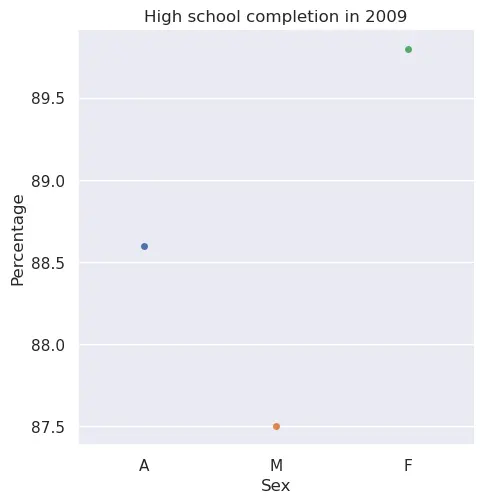

## Task: Plot for min degree percentage over time for a given racial category

Write a function `plot_race_compare_min_degree` that takes the educational attainment `data` and a string category and returns the result of calling the `sns` plotting function that best visualizes this data. The resulting plot should compare each of the 4 `Min degree` options, indicating the percentage of educational attainment for the given racial category and `Min degree` over the entire time range of available data. Due to missing data, not all min degree options will stretch the entire width of the plot. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Min degree for Hispanic" (if using Hispanic as the racial category).

In [ ]:
def plot_race_compare_min_degree(data, category):
    ...


ax = plot_race_compare_min_degree(data, "Hispanic").facet_axis(0, 0)
assert sorted([tuple(xy) for xy in line.get_xydata()] for line in ax.get_lines()[:4]) == [
    [(1980,  7.7), (1990,  8.1), (1995,  8.9), (2000,  9.7), (2005, 11.2), (2006,  9.5),
     (2007, 11.6), (2008, 12.4), (2009, 12.2), (2010, 13.5), (2011, 12.8), (2012, 14.8),
     (2013, 15.7), (2014, 15.1), (2015, 16.4), (2016, 18.7), (2017, 18.5), (2018, 20.7)],
    [(1980, 58.0), (1990, 58.2), (1995, 57.1), (2000, 62.8), (2005, 63.3), (2006, 63.2),
     (2007, 65.0), (2008, 68.3), (2009, 68.9), (2010, 69.4), (2011, 71.5), (2012, 75.0),
     (2013, 75.8), (2014, 74.7), (2015, 77.1), (2016, 80.6), (2017, 82.7), (2018, 85.2)],
    [                            (1995,  1.6), (2000,  2.1), (2005,  2.1), (2006,  1.5),
     (2007,  1.5), (2008,  2.0), (2009,  1.9), (2010,  2.5), (2011,  2.7), (2012,  2.7),
     (2013,  3.0), (2014,  2.9), (2015,  3.2), (2016,  4.1), (2017,  3.9), (2018,  3.4)],
    [                            (1995, 13.0), (2000, 15.4), (2005, 17.3), (2006, 16.1),
     (2007, 18.1), (2008, 18.7), (2009, 18.4), (2010, 20.5), (2011, 20.6), (2012, 22.7),
     (2013, 23.1), (2014, 23.4), (2015, 25.7), (2016, 27.0), (2017, 27.7), (2018, 30.5)],
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[4:]), "unexpected extra data"
assert ax.get_title() == "Min degree for Hispanic", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Task: Line plot comparing educational attainment by race over time

Write a function `line_plot_compare_race` that reproduces [the following line plot](https://periscopic.com/#!/impacts/americas-educational-attainment) using `seaborn` to compare the given `Min degree` attainment across all columns except for `Total` and `Two or more races` for sex `A` and years 2009 onward. Our dataset separates "Asian" and "Pacific Islander", which you can keep separate in your plot for simplicity even though they are combined in the interactive report. Label the x-axis "Year", the y-axis "Percentage", and title the plot "Attainment by race for all associate's" (if using associate's as the min degree).

<video style="max-width: 100%; max-height: 480px" loop="true" autoplay="true" muted="true" src="https://content.periscopic.com/uploads/46c2238b38244e86be008eb9898533bf.mp4"></video>

This task involves reading documentation and learning additional methods to solve the problem because `seaborn` plotting functions typically only accept data in a single column, whereas our dataset spreads educational attainment per race across several columns. For an additional challenge, don't read the recommended approach below.

<details>
<summary>Recommended approach</summary>

<ol>
<li>Select all rows where <code>Year</code> is 2009 and onwards and <code>Min degree</code> matches the given string.</li>
<li>Read the documentation for <code><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html">DataFrame.melt</a></code> to learn how to combine all the racial categories into a single column. Be sure to include the keyword argument <code>ignore_index=False</code> to keep the current <code>MultiIndex</code>. The <a href="https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long">corresponding section in the user guide</a> may also be helpful.</li>
<li>Read the documentation for <code><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html">DataFrame.set_index</a></code> to learn how to append the combined race categories column as another level of the <code>MultiIndex</code>. Be sure to include the keyword argument <code>append=True</code>.</li>
<li>Pass the melted, 4-level-indexed dataframe to the appropriate figure-level plotting function to produce your plot.</li>
</ol>
</details>

In [ ]:
def line_plot_compare_race(data, min_degree):
    ...


ax = line_plot_compare_race(data, "associate's").facet_axis(0, 0)
assert sorted([tuple(xy) for xy in line.get_xydata()] for line in ax.get_lines()[:6]) == [
    [(2009.0, 18.4), (2010.0, 20.5), (2011.0, 20.6), (2012.0, 22.7), (2013.0, 23.1),
     (2014.0, 23.4), (2015.0, 25.7), (2016.0, 27.0), (2017.0, 27.7), (2018.0, 30.5)],
    [(2009.0, 20.8), (2010.0, 28.9), (2011.0, 25.0), (2012.0, 23.6), (2013.0, 26.3),
     (2014.0, 18.2), (2015.0, 22.3), (2016.0, 16.5), (2017.0, 27.1), (2018.0, 24.4)],
    [(2009.0, 20.9), (2010.0, 22.0), (2011.0, 39.7), (2012.0, 32.4), (2013.0, 37.3),
                     (2015.0, 24.9), (2016.0, 28.6), (2017.0, 35.8), (2018.0, 22.6)],
    [(2009.0, 27.8), (2010.0, 29.4), (2011.0, 29.8), (2012.0, 31.6), (2013.0, 29.5),
     (2014.0, 32.0), (2015.0, 31.1), (2016.0, 31.7), (2017.0, 32.7), (2018.0, 32.6)],
    [(2009.0, 47.1), (2010.0, 48.9), (2011.0, 50.1), (2012.0, 49.9), (2013.0, 51.0),
     (2014.0, 51.9), (2015.0, 54.0), (2016.0, 54.3), (2017.0, 53.5), (2018.0, 53.6)],
    [(2009.0, 66.7), (2010.0, 63.4), (2011.0, 64.6), (2012.0, 68.3), (2013.0, 67.2),
     (2014.0, 70.3), (2015.0, 71.7), (2016.0, 71.5), (2017.0, 69.9), (2018.0, 75.5)],
], "data does not match expected"
assert all(line.get_xydata().size == 0 for line in ax.get_lines()[6:]), "unexpected extra data"
assert ax.get_title() == "Attainment by race for all associate's", "title does not match expected"
assert ax.get_xlabel() == "Year", "x-label does not match expected"
assert ax.get_ylabel() == "Percentage", "y-label does not match expected"

## Writeup: Visualizations and persuasive rhetoric

Visualizations are persuasive even when we design them using communication practices that aim to create an "unemotional", "distanced", or "neutral" analysis. For instance, the choice of bar plot versus scatter plot brings with it different baggage: readers make different assumptions about the data based on the type of plot and its visual presentation. And, as we experienced in the final programming task, the data itself can be structured in such a way as to make some data visualizations easier to produce than others, affording (making more likely) certain data analyses over other data analyses.

Consider this alternative title for your final programming task. **[Using the Progress toward Racial Equity interactive report](https://www.luminafoundation.org/stronger-nation/report/#/progress/racial_equity&equity-time-age=25_34&equity-geo-age=25_34), explain how this alternative title might suggest a misleading, incomplete, or otherwise harmful conclusion about racial equity in educational attainment.**

*Replace this text with your answer.*

In [ ]:
line_plot_compare_race(data, "associate's").set(title="Asian educational attainment reaches new heights")